In [103]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
def most_common(lst):
    return max(set(lst),key=lst.count)

def euclidian(p1,p2):
    
    return np.sqrt(np.sum((p1-p2)**2,axis=1))

In [136]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidian):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    
    
    
        

In [137]:
iris=datasets.load_iris()
X=iris['data']
Y=iris['target']

In [138]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [139]:
ss=StandardScaler().fit(X_train)
X_train,X_test=ss.transform(X_train),ss.transform(X_test)

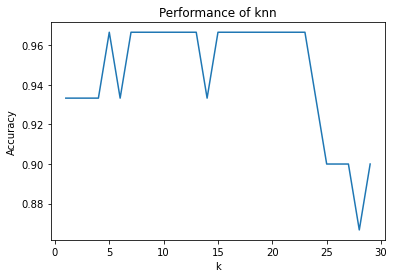

In [140]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, Y_train)
    accuracy = knn.evaluate(X_test, Y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()
    